# Load Libraries

In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(12,10))
plt.rc('axes', grid=True)

# Load Data

In [3]:
delsys_data = pd.read_csv('./delsys_data.csv')
rcs_data = pd.read_csv('./rcs_data.csv')

# Plot Raw Signal from Delsys and RC+S

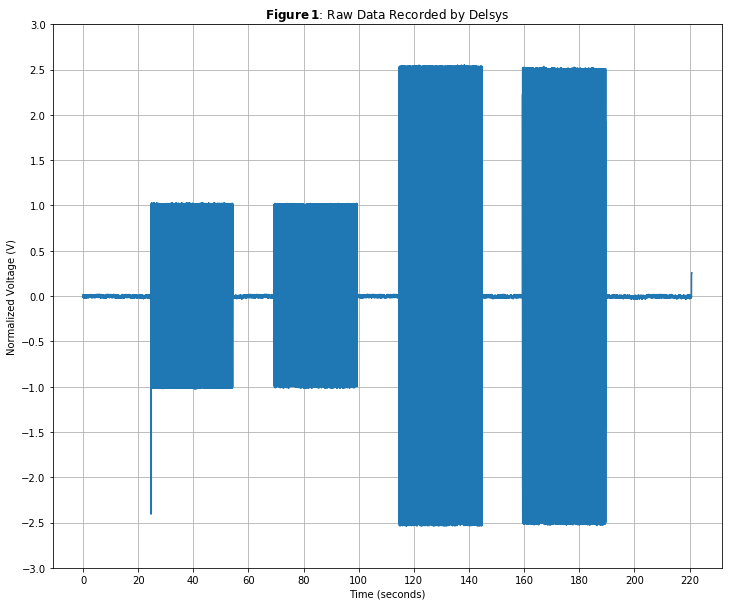

In [4]:
f1, ax = plt.subplots()
ax.plot(delsys_data.seconds,delsys_data.voltage_normalize)
ax.set(ylim = (-3,3),
      yticks = np.arange(-3,3.5,.5),
      xticks = np.arange(0,240,20),
      xlabel = 'Time (seconds)',
      ylabel = 'Normalized Voltage (V)',
      title = r'$\bfFigure\/1$: Raw Data Recorded by Delsys')
plt.show()

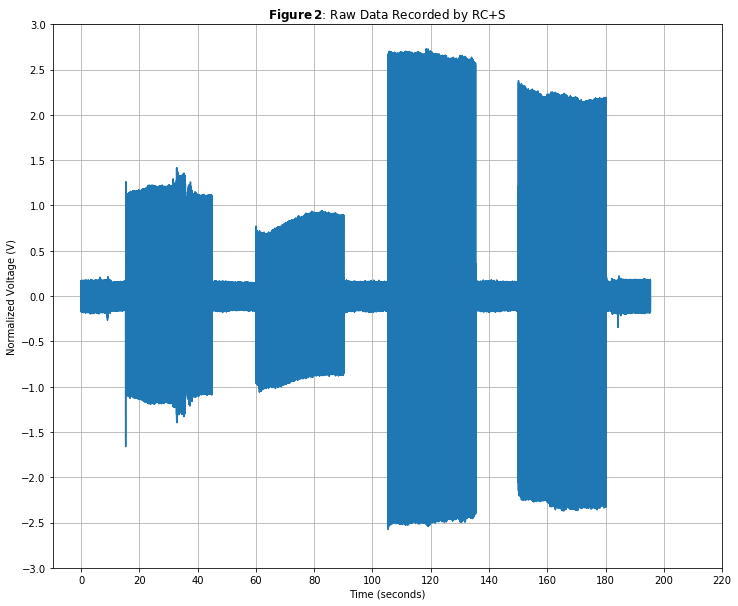

In [5]:
f2, ax = plt.subplots()
ax.plot(rcs_data.normed_seconds,rcs_data.voltage_normalize)
ax.set(ylim = (-3,3),
      yticks = np.arange(-3,3.5,.5),
      xticks = np.arange(0,240,20),
      xlabel = 'Time (seconds)',
      ylabel = 'Normalized Voltage (V)',
      title = r'$\bfFigure\/2$: Raw Data Recorded by RC+S')
plt.show()

# Plot a Spectrogram for Both Delsys and RC+S Data

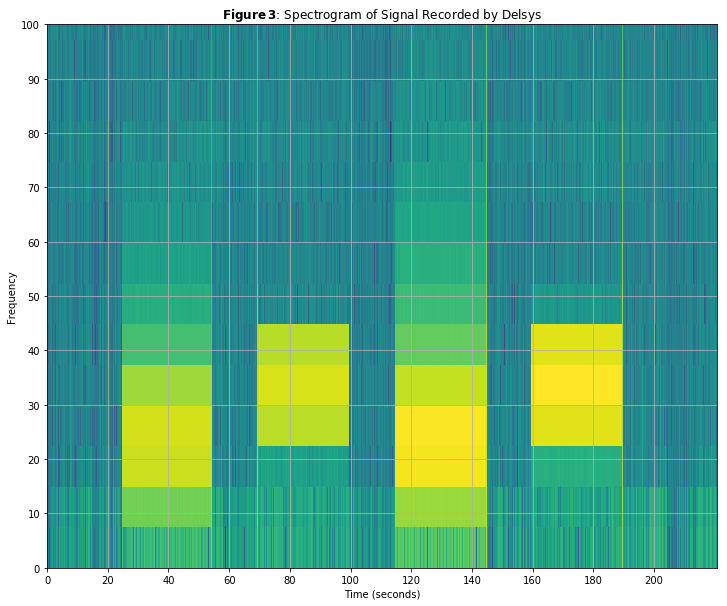

In [6]:
f3, ax = plt.subplots()
ax.specgram(delsys_data.voltage_normalize, Fs = 1926)
ax.set(ylim = (0,100), 
       yticks = np.arange(0,110,10), 
       xticks = np.arange(0,220,20),
      xlabel = 'Time (seconds)',
      ylabel = 'Frequency',
      title = r'$\bfFigure\/3$: Spectrogram of Signal Recorded by Delsys')
plt.show()

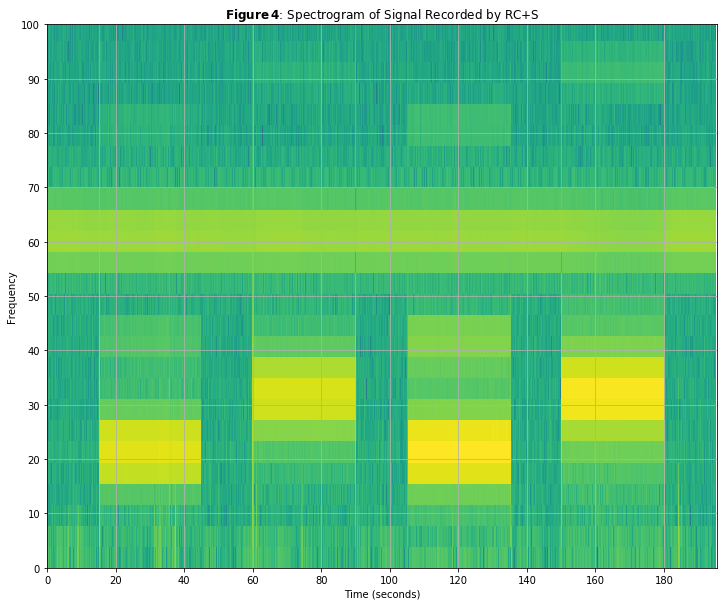

In [7]:
f4, ax = plt.subplots()
ax.specgram(rcs_data.voltage_normalize, Fs = 1000)
ax.set(ylim = (0,100), 
       yticks = np.arange(0,110,10), 
       xticks = np.arange(0,220,20),
       xlim = (0,195.38),
      xlabel = 'Time (seconds)',
      ylabel = 'Frequency',
      title = r'$\bfFigure\/4$: Spectrogram of Signal Recorded by RC+S')
plt.show()

# Align the Signal Received from the Delsys and the RC+S

### For this example, the alignment was done by hand. Next steps will involve developing an automatic algorithm for signal alignment.

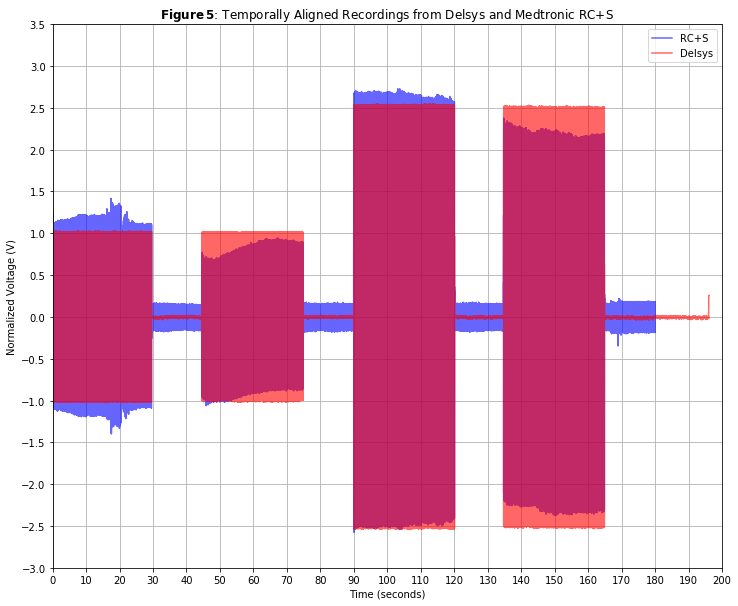

In [8]:
f5, ax = plt.subplots()

ax.plot((rcs_data.normed_seconds - 15.3569), rcs_data.voltage_normalize,'b', alpha=.6, label = 'RC+S')
ax.plot((delsys_data.seconds - 24.7087), delsys_data.voltage_normalize, 'r', alpha = .6, label = 'Delsys')
ax.set(xlim = (0,200), 
       xticks = np.arange(0,210,10), 
       yticks = np.arange(-3,4,.5),
      xlabel = 'Time (seconds)',
      ylabel = 'Normalized Voltage (V)',
      title = r'$\bfFigure\/5$: Temporally Aligned Recordings from Delsys and Medtronic RC+S')
ax.legend()
plt.show()

### The overlap in the signal is very close and there is little drift across the ~3.5 minute recording. Next steps will involve determining signal drift and packet loss in recordings of longer duration.